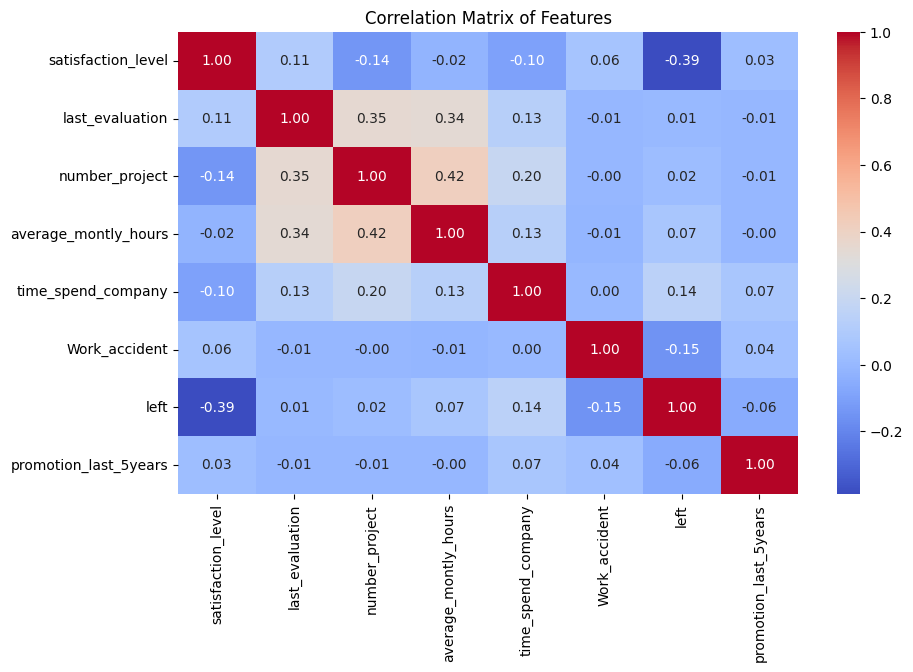

<ipython-input-2-9ce41facf13f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_retention.index, y=salary_retention.values, palette="coolwarm")


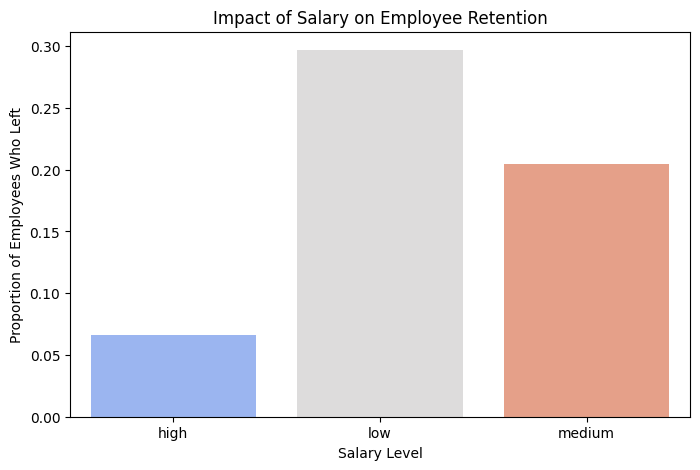

<ipython-input-2-9ce41facf13f>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=department_retention.index, y=department_retention.values, palette="viridis")


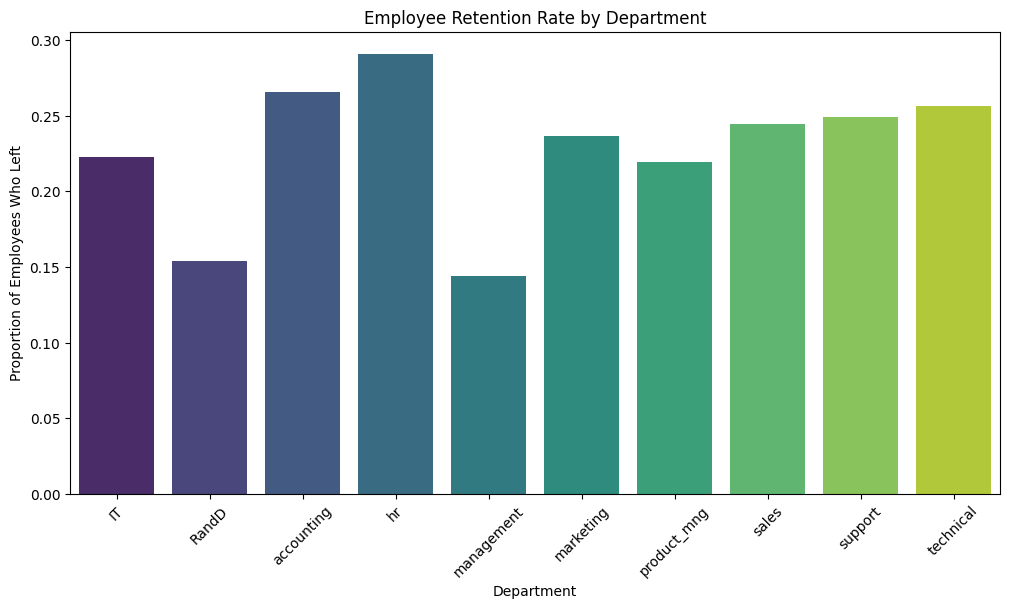

<ipython-input-2-9ce41facf13f>:53: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.65341156  0.15695385 -0.65341156 ...  0.96731926  0.15695385
 -1.46377697]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.iloc[:, :5] = scaler.fit_transform(X_train.iloc[:, :5])
<ipython-input-2-9ce41facf13f>:53: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.2608872  -0.10065248 -0.52126862 ...  0.96090253  0.33999299
  0.36002233]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_train.iloc[:, :5] = scaler.fit_transform(X_train.iloc[:, :5])
<ipython-input-2-9ce41facf13f>:53: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.34061666  1.02407141 -1.02629282 ... -1.02629282  1.02407141
  0.340616

Model Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.59      0.35      0.44       706

    accuracy                           0.79      3000
   macro avg       0.70      0.64      0.65      3000
weighted avg       0.77      0.79      0.77      3000



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = "/content/HR_comma_sep (1).csv"  # Ensure this file is in your working directory
df = pd.read_csv(file_path)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

# Bar chart: Impact of salary on retention
salary_retention = df.groupby("salary")["left"].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=salary_retention.index, y=salary_retention.values, palette="coolwarm")
plt.title("Impact of Salary on Employee Retention")
plt.xlabel("Salary Level")
plt.ylabel("Proportion of Employees Who Left")
plt.show()

# Bar chart: Impact of department on retention
department_retention = df.groupby("Department")["left"].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=department_retention.index, y=department_retention.values, palette="viridis")
plt.title("Employee Retention Rate by Department")
plt.xlabel("Department")
plt.ylabel("Proportion of Employees Who Left")
plt.xticks(rotation=45)
plt.show()

# Selecting key features
features = ["satisfaction_level", "number_project", "average_montly_hours",
            "time_spend_company", "Work_accident", "promotion_last_5years",
            "salary", "Department"]
X = df[features]
y = df["left"]  # Target variable

# Encoding categorical variables (Salary and Department)
X = pd.get_dummies(X, columns=["salary", "Department"], drop_first=True)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing numerical features
scaler = StandardScaler()
X_train.iloc[:, :5] = scaler.fit_transform(X_train.iloc[:, :5])
X_test.iloc[:, :5] = scaler.transform(X_test.iloc[:, :5])

# Building and training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Measuring accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: 

Model Accuracy: 0.95
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       0.50      1.00      0.67         1

    accuracy                           0.95        21
   macro avg       0.75      0.83      0.78        21
weighted avg       0.93      0.95      0.94        21



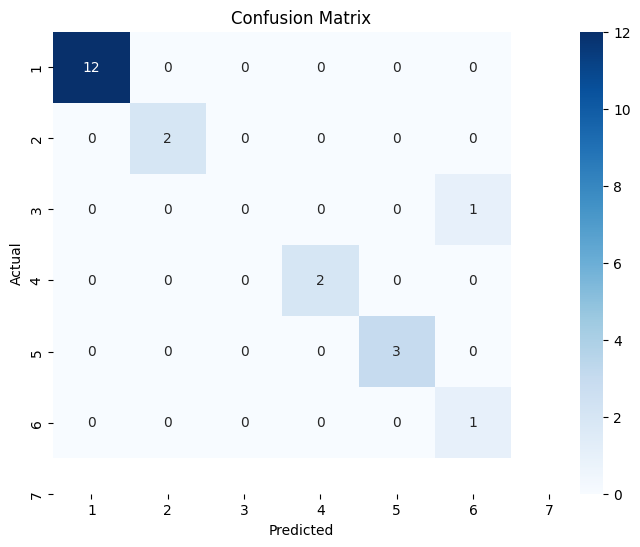

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Load the datasets
zoo_df = pd.read_csv("/content/zoo-data (1).csv")
class_df = pd.read_csv("/content/zoo-class-type (1).csv")

# Drop the 'animal_name' column since it's not useful for classification
zoo_df = zoo_df.drop(columns=['animal_name'])

# Split data into features (X) and target (y)
X = zoo_df.drop(columns=['class_type'])
y = zoo_df['class_type']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(max_iter=500, multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = "/mnt/data/HR_comma_sep (1).csv"
df = pd.read_csv(file_path)

# Exploratory Data Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Features")
plt.show()

# Bar chart: Impact of salary on retention
salary_retention = df.groupby("salary")["left"].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=salary_retention.index, y=salary_retention.values, palette="coolwarm")
plt.title("Impact of Salary on Employee Retention")
plt.xlabel("Salary Level")
plt.ylabel("Proportion of Employees Who Left")
plt.show()

# Bar chart: Impact of department on retention
department_retention = df.groupby("Department")["left"].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=department_retention.index, y=department_retention.values, palette="viridis")
plt.title("Employee Retention Rate by Department")
plt.xlabel("Department")
plt.ylabel("Proportion of Employees Who Left")
plt.xticks(rotation=45)
plt.show()

# Selecting key features based on EDA
features = ["satisfaction_level", "number_project", "average_montly_hours", "time_spend_company", "salary", "Department"]
X = df[features]
y = df["left"]  # Target variable (0 = Stay, 1 = Leave)

# Encoding categorical variables (Salary and Department)
X = pd.get_dummies(X, columns=["salary", "Department"], drop_first=True)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")


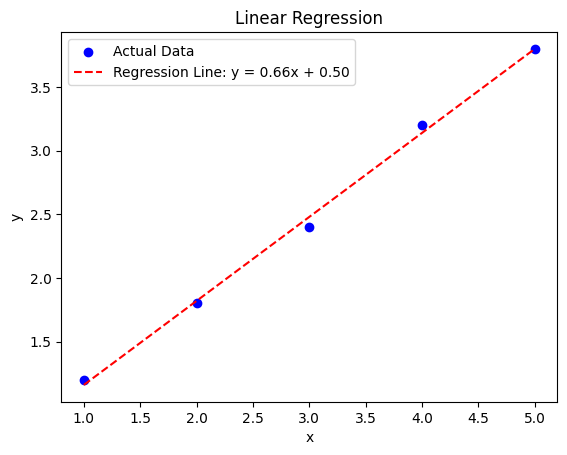

Linear Regression Equation: y = 0.66x + 0.50


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = "/content/linearregression.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Extract features and target variable
X = df[['x']].values  # Independent variable
y = df['y'].values    # Dependent variable

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Predict y values
y_pred = model.predict(X)

# Plot the data points and regression line
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linestyle='--', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Print equation
print(f"Linear Regression Equation: y = {slope:.2f}x + {intercept:.2f}")

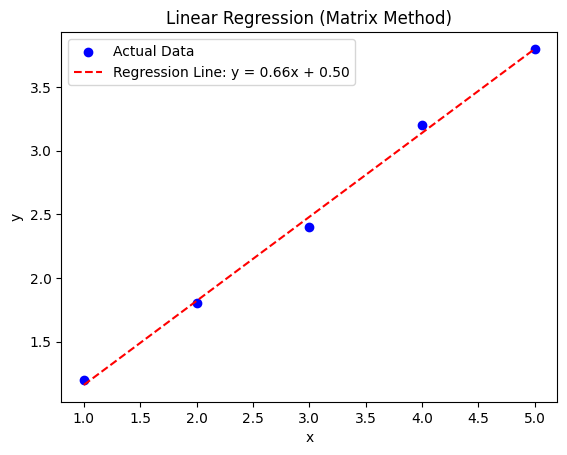

Linear Regression Equation: y = 0.66x + 0.50


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/linearregression.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Extract features and target variable
X = df[['x']].values  # Independent variable
y = df['y'].values.reshape(-1, 1)  # Dependent variable (reshaped as column vector)

# Add a column of ones to X for the intercept term
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # X_b = [1 x]

# Compute theta using the Normal Equation
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Extract slope and intercept
intercept, slope = theta.flatten()

# Predict y values
y_pred = X_b.dot(theta)

# Plot the data points and regression line
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linestyle='--', label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression (Matrix Method)')
plt.legend()
plt.show()

# Print equation
print(f"Linear Regression Equation: y = {slope:.2f}x + {intercept:.2f}")
